TLDR of what we are going to do:

Step 1 : Importing all the required packages and dataset for the assignment

Step 2 : Data preprocessing

* Step 2A: Cleaning up the data of missing/NaN values
* Step 2B: Cleaning up the data of 0 values
* Step 2C: Dealing with categorical values
* Step 2D: Dealing with duplicate rows in the data
* Step 2E: Z score normalisation and oulier removal
* Step 2F: Splitting the data into train and test set

Step 3: Logistic regression with one variable (univariate)

* Step 3A: Deciding on the input feature/variable
* Step 3B: Deciding on the output or predicted variable/feature
* Step 3C: Running gradient descent
* Step 3D: Graphing the output sigmoid function with boundary
* Step 3E: Calculating the F1 Score

**Step 1 : Importing all the required packages and dataset for the assignment**

We will be using Numpy Library to use the mathematical functions needed. Within Numpy, we will use Numpy.linalg sub package for specific linear algebra functions

We will also use Pandas library for easy data manipulation and analysis. It will aid us with importing and manipulating the dataset during the preprocessing step and input it for training the model.

Using pandas we will also import the CSV file into the program. Our dataset after opening in a spreadsheet program has been confirmed to have 33 columns and 569 rows.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

cancer = pd.read_csv("/content/breast_cancer.csv")

*We can check the imported data by printing the first few(5 to be precise) rows and all columns using the* **head() method in pandas**

In [3]:
print(cancer.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

*We can also use* **describe() function to**
>Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

[ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html ]

In [4]:
print(cancer.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

**Step 2 : Data preprocessing**

**Step 2A: Cleaning up the data of missing/NaN values**

We will start by analysing columns that have lots of Nan values first, then look at rows.

If a column has a lot of NaN values then there is little meaningful data that we can extract from it and it serves better to drop that column. To do this we use the use a for loop to cycle through all columns printing how many NaN values there are using the **isna() function and sum() function to add them all up for each column**

In [5]:
i=1
print("## | Column Name               | Count")
print("--------------------------------------")
for c in cancer.columns:
  print(f"{i:02d}",c.ljust(25," "),cancer[c].isna().sum(),sep=" | ")
  i+=1


## | Column Name               | Count
--------------------------------------
01 | id                        | 0
02 | diagnosis                 | 0
03 | radius_mean               | 0
04 | texture_mean              | 0
05 | perimeter_mean            | 0
06 | area_mean                 | 0
07 | smoothness_mean           | 0
08 | compactness_mean          | 0
09 | concavity_mean            | 0
10 | concave points_mean       | 0
11 | symmetry_mean             | 0
12 | fractal_dimension_mean    | 0
13 | radius_se                 | 0
14 | texture_se                | 0
15 | perimeter_se              | 0
16 | area_se                   | 0
17 | smoothness_se             | 0
18 | compactness_se            | 0
19 | concavity_se              | 0
20 | concave points_se         | 0
21 | symmetry_se               | 0
22 | fractal_dimension_se      | 0
23 | radius_worst              | 0
24 | texture_worst             | 0
25 | perimeter_worst           | 0
26 | area_worst                | 0
27 | smoothn

As we can see, there are 33 columns in the dataset of which there is a column called **Unnamed** that contains *569 NaN* values (which is basically an entire column of NaN). The rest of the columns have no Nan values so we don't need to search NaN values anymore in rows.

(If there were NaN values in columns then we can replace NaN occurence with 0 and process them in the next step)

**So we choose to drop this column from this dataset**

*Quick note: I tried to drop Unnamed but turns out Unnamed: 32 is the actual column name. Quick google search revealed that this is due to poor conversion of data from one type to csv, probably due to using some automated way to convert to csv or might also be the column that was used to index the dataset*

*Alternatively refer to this - https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv*

In [6]:
cancer.drop("Unnamed: 32", axis=1, inplace=True) #we do inplace so that the original dataset is overwritten

  **Step 2B: Cleaning up the data of 0 values**

Now that there are no NaN, we find out how many 0s there are in each row and column. The goal is to replace 0 with meaningful value like the mean of the column or dropping a row entirely if it has too many zero's

In [7]:
i=1
print("## | Column Name               | Count")
print("--------------------------------------")
for c in cancer.columns:
  t=(cancer[c]==0).sum()
  print(f"{i:02d}",c.ljust(25," "),t,sep=" | ")
  i+=1

## | Column Name               | Count
--------------------------------------
01 | id                        | 0
02 | diagnosis                 | 0
03 | radius_mean               | 0
04 | texture_mean              | 0
05 | perimeter_mean            | 0
06 | area_mean                 | 0
07 | smoothness_mean           | 0
08 | compactness_mean          | 0
09 | concavity_mean            | 13
10 | concave points_mean       | 13
11 | symmetry_mean             | 0
12 | fractal_dimension_mean    | 0
13 | radius_se                 | 0
14 | texture_se                | 0
15 | perimeter_se              | 0
16 | area_se                   | 0
17 | smoothness_se             | 0
18 | compactness_se            | 0
19 | concavity_se              | 13
20 | concave points_se         | 13
21 | symmetry_se               | 0
22 | fractal_dimension_se      | 0
23 | radius_worst              | 0
24 | texture_worst             | 0
25 | perimeter_worst           | 0
26 | area_worst                | 0
27 | smo

We see that there are 4 columns having zero values. Each has 13 rows. So, at most 13*4 = 52 rows have one feature each having 0s in them (affects 9.25% of the dataset) or at least 13 rows have 4 zeros in them (affecting 2.28% of the dataset).

*Opening up the CSV in spreadsheet, the intuition that concavity based columns are zero all in the same row. This means only 13 rows are affected. To address this, my thought process is to find the mean value of these columns and fill them. However, this being a classification problem, I will find mean for malignant(M) and benign(B) seperately and then based on what the diagnosis for that row is, fill the appropriate mean*

In [8]:
mean_diagnosis = cancer.groupby("diagnosis")['concavity_mean','concave points_mean','concavity_worst','concave points_worst','concavity_se','concave points_se'].mean()
print(mean_diagnosis)

           concavity_mean  concave points_mean  concavity_worst  \
diagnosis                                                         
B                0.046058             0.025717         0.166238   
M                0.160775             0.087990         0.450606   

           concave points_worst  concavity_se  concave points_se  
diagnosis                                                         
B                      0.074444      0.025997           0.009858  
M                      0.182237      0.041824           0.015060  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


*Here I want to point out that I have switched from using chained indexing to using the **loc()** function to store the mean values to avoid warning*

In [9]:
for i in cancer.index:
  if(cancer['concavity_mean'][i]==0):
    if(cancer['diagnosis'][i]=='B'):
      cancer.loc[i,'concavity_mean']=mean_diagnosis.loc['B','concavity_mean']
      cancer.loc[i,'concave points_mean']=mean_diagnosis.loc['B','concave points_mean']
      cancer.loc[i,'concavity_worst']=mean_diagnosis.loc['B','concavity_worst']
      cancer.loc[i,'concave points_worst']=mean_diagnosis.loc['B','concave points_worst']
      cancer.loc[i,'concavity_se']=mean_diagnosis.loc['B','concavity_se']
      cancer.loc[i,'concave points_se']=mean_diagnosis.loc['B','concave points_se']
    else:
      cancer.loc[i,'concavity_mean']=mean_diagnosis.loc['M','concavity_mean']
      cancer.loc[i,'concave points_mean']=mean_diagnosis.loc['M','concave points_mean']
      cancer.loc[i,'concavity_worst']=mean_diagnosis.loc['M','concavity_worst']
      cancer.loc[i,'concave points_worst']=mean_diagnosis.loc['M','concave points_worst']
      cancer.loc[i,'concavity_se']=mean_diagnosis.loc['M','concavity_se']
      cancer.loc[i,'concave points_se']=mean_diagnosis.loc['M','concave points_se']


Now if we check for zeros in the dataset we will get the following output, where the dataset doesn't have anymore zeroes present in it.

In [10]:
i=1
zero_column=[]
print("## | Column Name               | Count")
print("--------------------------------------")
for c in cancer.columns:
  t=(cancer[c]==0).sum()
  if(t==0):
    zero_column.append(c)
  print(f"{i:02d}",c.ljust(25," "),t,sep=" | ")
  i+=1

## | Column Name               | Count
--------------------------------------
01 | id                        | 0
02 | diagnosis                 | 0
03 | radius_mean               | 0
04 | texture_mean              | 0
05 | perimeter_mean            | 0
06 | area_mean                 | 0
07 | smoothness_mean           | 0
08 | compactness_mean          | 0
09 | concavity_mean            | 0
10 | concave points_mean       | 0
11 | symmetry_mean             | 0
12 | fractal_dimension_mean    | 0
13 | radius_se                 | 0
14 | texture_se                | 0
15 | perimeter_se              | 0
16 | area_se                   | 0
17 | smoothness_se             | 0
18 | compactness_se            | 0
19 | concavity_se              | 0
20 | concave points_se         | 0
21 | symmetry_se               | 0
22 | fractal_dimension_se      | 0
23 | radius_worst              | 0
24 | texture_worst             | 0
25 | perimeter_worst           | 0
26 | area_worst                | 0
27 | smoothn

  **Step 2C: Dealing with categorical values**

In this step we convert categorical values into numerical values. This is because we need numerical data to train the model. Now this requires some level of understanding of the data but in this case it is a simple boolean transformation.

The only feature that has non numeric data is the diagnosis field which has malignant(M) and benign(B). We will convert malignant as 1 and benign as 0.

*Note that these are discrete values with no meaning for values in between like 0.5* 

In [11]:
cancer["diagnosis"].replace({"B": 0, "M": 1},inplace=True)

  **Step 2D: Dealing with duplicate rows in the data**

We can check if there are any duplicate data in the dataset using the **duplicated()** method as it

>Return boolean Series denoting duplicate rows.

[ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html ]

In [12]:
print("Number of duplicate rows: "+str(cancer.duplicated().sum()))

Number of duplicate rows: 0


In [13]:
cancer_backup = cancer

In [14]:
cancer=cancer_backup

From the above output, the dataset doesn't have any duplicate values. This means there aren't any duplicate rows to remove and we can move on to the next step.

**Step 2E: Z score normalisation and oulier removal**

Since we are going to do univariate logistic regression, we will normalise and remove outlier only for the single input feature. We will do all feature normalisation and outlier removal for multivariate logistic regression.


We will first remove outlier values. Refer to the article : https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/


Then we will standardise the data using z score standardisation. Refer to the article : https://www.statology.org/z-score-normalization/

To remove the outlier, we can use the property of Gaussian distribution to remove the 3rd standard deviation of the data. This means any data that is out of the 99.7% percent is removed.

In [15]:
lower, upper = cancer['radius_mean'].mean() - cancer['radius_mean'].std(ddof=0)*3, cancer['radius_mean'].mean() + cancer['radius_mean'].std(ddof=0)*3
for i in cancer.index:
  temp = cancer['radius_mean'][i]
  if temp < lower or temp > upper:
    cancer.drop([i],inplace=True)


In [16]:
old_mean = cancer['radius_mean'].mean()
#print("Old Mean:" ,old_mean)
old_std = cancer['radius_mean'].std(ddof=0)
#print("Old Standard Deviation: ",old_std)
cancer['radius_mean'] = (cancer['radius_mean'] - old_mean)/old_std
new_mean=cancer['radius_mean'].mean()
new_std=cancer['radius_mean'].std(ddof=0)
#print("New Mean:" ,new_mean)
#print("New Standard Deviation: ",new_std)


In [17]:
print(cancer.shape[0])
cancer.describe()

564


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.640000e+02,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,...,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,2.899128e+07,0.367021,-7.558965e-16,19.267429,91.182943,640.946631,0.096234,0.103414,0.087738,0.048364,...,16.129023,25.656826,106.259096,860.437589,0.132288,0.252651,0.273415,0.115116,0.290309,0.083974
std,1.199330e+08,0.482420,1.000888e+00,4.301289,22.909229,319.713255,0.014058,0.051983,0.075867,0.036410,...,4.610912,6.144142,31.951613,526.523939,0.022871,0.156318,0.203800,0.062526,0.061774,0.018073
min,8.670000e+03,0.000000,-2.113900e+00,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,8.690778e+05,0.000000,-6.995703e-01,16.167500,75.022500,419.525000,0.086038,0.064315,0.031115,0.020995,...,13.002500,21.075000,84.057500,513.975000,0.116600,0.145925,0.122900,0.066500,0.250475,0.071412
50%,9.060010e+05,0.000000,-2.180100e-01,18.835000,86.040000,546.200000,0.095785,0.092230,0.060070,0.033300,...,14.915000,25.405000,97.585000,683.950000,0.131250,0.211750,0.225450,0.098855,0.282250,0.080015
75%,8.825022e+06,1.000000,5.167265e-01,21.735000,103.625000,768.325000,0.104950,0.129825,0.126625,0.070468,...,18.520000,29.547500,124.450000,1037.250000,0.146000,0.333450,0.379450,0.161000,0.318025,0.092082
max,9.113205e+08,1.000000,3.189725e+00,39.280000,166.200000,1841.000000,0.163400,0.345400,0.426800,0.201200,...,32.490000,49.540000,214.000000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


As we can see from the new and old, we have successfully normalised the data. The mean is now ~0 and standard deviation is ~1. Also, the number of rows has now become 564 from 569.

But then comes the question of why we did the following and in this specific order:


1.   We filled the missing data with the mean before removing outlier
2.   We removed outliers
3.   After removing outliers we then stadardised the data

The reason we fill the missing data before removing outlier is to maintain the integrity of the dataset. We should not fill a skewed or updated mean to the missing data. Rather, we should try and maintain the randomness of the dataset.

But once we have preprocessed the missing values, then we need to remove the outliers to prevent it messing with our model.

  **Step 2F: Splitting the data into train and test set**

Finally, once the data has been preprocessed, we need to split in into training and test set. This is so that we can train the model on one set and test it against the other so that we can measure the accuracy of our model.

I have chosen to take 80% of the data (455 rows) to train the model while the rest 20% of the data (114 rows) will be used to test the model's accuracy. This concludes the preprocessing steps.

In [18]:
benign_dataset = cancer[cancer['diagnosis']==0]
malignant_dataset = cancer[cancer['diagnosis']==1]
benign_dataset.reset_index(inplace=True,drop=True)
malignant_dataset.reset_index(inplace=True,drop=True)
benign_size = len(benign_dataset.index)
malignant_size=len(malignant_dataset.index)
print("benign size=",benign_size)
print("malignant size=",malignant_size)
benign_70 = int((1.0*benign_size*70.0)/100.0)
malignant_70 = int((1.0*malignant_size*70.0)/100.0)
print("70% benign size=",benign_70)
print("70% malignant size=",malignant_70)
cancer_train = benign_dataset[:benign_70]
cancer_train=pd.concat([cancer_train,malignant_dataset[:malignant_70]],ignore_index=True)

print("Cancer training dataset size = ",len(cancer_train.index))
cancer_test = benign_dataset[benign_70:]
cancer_test=pd.concat([cancer_test,malignant_dataset[malignant_70:]],ignore_index=True)

print("Cancer testing dataset size = ",len(cancer_test.index))

cancer_test = cancer_test.sample(frac=1)
cancer_train = cancer_train.sample(frac=1)
cancer_train.reset_index(inplace=True,drop=True)
cancer_test.reset_index(inplace=True,drop=True)
print(cancer_train)

benign size= 357
malignant size= 207
70% benign size= 249
70% malignant size= 144
Cancer training dataset size =  393
Cancer testing dataset size =  171
           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      893783          0    -0.695814         19.11           74.33   
1      871149          0    -0.936219         12.96           68.69   
2     8610629          0    -0.145889         10.94           87.91   
3     8812877          1     0.521234         20.25          102.60   
4    88143502          0     0.097521         13.47           92.51   
..        ...        ...          ...           ...             ...   
388  88649001          1     1.663156         28.77          133.60   
389    906290          0    -0.858087         21.41           70.95   
390    872608          0    -1.235522         18.06           64.60   
391     89524          0     0.028405         12.88           90.03   
392    892604          0    -0.467430         19.89           80.4

**Step 3: Logistic regression with one variable (univariate)**

  **Step 3A: Deciding on the input feature/variable**

The output feature that the hypothesis will be guessing will be the diagnosis feature from the dataset. For the univariate problem however, we need to decide upon one input feature for the model.

I have decided to take **radius_mean** as that input feature. The reasoning is that if we were to choose based on the avearge size of the mass then it might be a good enough variable to use.

  **Step 3B: Deciding on the output or predicted variable/feature**

Obviously, from the dataset we have to determine if the given tumour and its feature makes it malignant (cancerous) or benign (non cancerous). This is abbreviated to M and B in the dataset under **diagnosis** feature.

With the input and output features decided, we can visualise the data on a 2D graph:

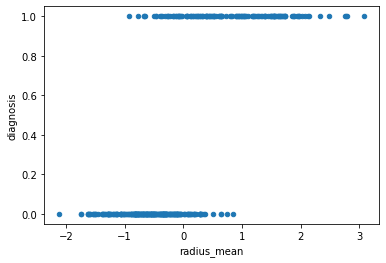

In [19]:
cancer_train.plot(kind='scatter', x='radius_mean', y='diagnosis')
plot.show()

As expected there is a lot of overlap in the output feature. This is because we are choosing just a single feature to try and predict the output while ignoring every other feature.

In any case we will start with running the univariate logistic regression algorithm utilising gradient descent to try and create an optimum decision boundary.

**Step 3C: Running gradient descent**



> Return an array of ones of any dimension => Use **np.ones()**
>
>[ https://numpy.org/doc/stable/reference/generated/numpy.ones.html ]
>
> **arr = np.stack((arr,arr))** => stack arrays from left to right to form a matrix
>
>[ https://numpy.org/devdocs/reference/generated/numpy.stack.html#numpy.stack ]
>
> X_r2=cancer_train['radius_mean'].**to_numpy()** => convert a column into a 1D array
>
>[ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html ]
>
> For matrix multiplication, use **np.dot()** or **np.matmul()**
>
>[ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html ]


In [20]:
m=len(cancer_train.index)   #number of training set rows
alpha = 0.003   #leaning rate
#X = np.c_[np.ones((X.shape[0],1)), X[:]]
X_r1=np.ones(m)
X_r2=cancer_train['radius_mean'].to_numpy()
X=np.stack((X_r1,X_r2))   #X0 and X1 are here

theta = np.random.rand(2)   # theta 0 and theta 1 are here 

y = cancer_train['diagnosis'].to_numpy()  #y is here

cost_list = []
cost_list.append(1e10) #starting off with a large value for the cost function. From here we will optimise down to minimum
iter = 0
run=True
while run:
  iter+=1
  Z=np.dot(theta,X)

  prediction = 1 / (1 + np.exp(-Z))

  costTrue=np.dot(y,np.log(prediction.T))
  costFalse=np.dot(1-y,np.log(1-prediction).T)
  temp=(costTrue+costFalse)/(-1*m)
  cost_list.append(temp)
  #cost = np.sum(-(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))) / m

  changeInCost = cost_list[iter-1]-cost_list[iter]

  theta -= alpha * (1/m) * np.matmul((prediction-y),X.T)
  #theta -=(alpha * (1/m) * np.dot(x.T, error))
  if changeInCost < 1e-10:
    run=False
cost_list.pop(0)

10000000000.0

In [21]:
print(theta)

[-0.52704779  3.36651898]


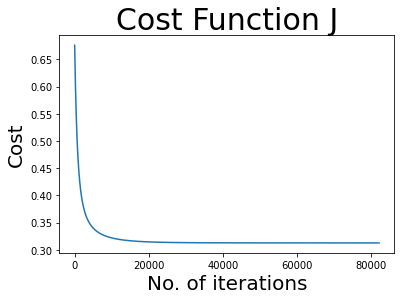

In [22]:
plot.title('Cost Function J', size = 30)
plot.xlabel('No. of iterations', size=20)
plot.ylabel('Cost', size=20)
plot.plot(cost_list)
plot.show()

0.17


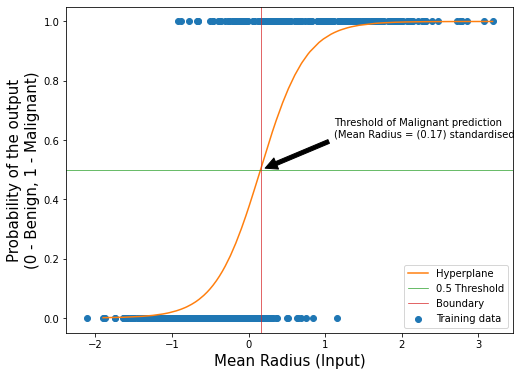

In [23]:
plot.figure(1, figsize=(8, 6))
plot.clf()
Xt_r2=cancer_test['radius_mean'].to_numpy()
loss = 1 / (1 + np.exp(-1*(Xt_r2*theta[1] + 1*theta[0])))
plot.scatter(x=cancer['radius_mean'], y=cancer['diagnosis'], label='Training data', c='C0')
x_axis=cancer_test['radius_mean'].to_numpy()
loss=loss[x_axis.argsort()]
test_diagnosis=cancer_test['diagnosis'].to_numpy()
test_diagnosis=test_diagnosis[x_axis.argsort()]
x_axis.sort()
plot.plot(x_axis,loss, c='C1', label='Hyperplane')

plot.xlabel('Mean Radius (Input)', fontsize=15)
plot.ylabel("Probability of the output" "\n" "(0 - Benign, 1 - Malignant)", fontsize=15)
plot.axhline(0.5, c='C2',label='0.5 Threshold', linewidth=0.7)


# np.where(loss>=0.5) will return the array positions where the positions where the predicted values are greater than 0.5 probability
# this will an be an array which will be returned wrapped in an array hence why we are using [][]
# now since we have sorted the x axis, the first element in that array will be the threshold point from where the model will predict 1
# hence we are setting the bundary as Xt_r2[np.where(loss >= 0.5)[0][0]]
boundary = Xt_r2[np.where(loss >= 0.5)[0][0]]

print(round(boundary,3))

# now once we have the boundary value, we can plot that on the graph as well (the green line represents the 0.5 probability threshold)
# (the red line represents the boundary value at which the model predicts 1)

plot.axvline(boundary, c='C3',label='Boundary', linewidth=0.7)
plot.legend(loc='lower right')
plot.annotate('Threshold of Malignant prediction \n(Mean Radius = ({}) standardised'.format(round(boundary,3)),xy=(boundary,0.5),xytext=(0.6, 0.6),textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.05))
plot.show()

In [24]:
# DO NOT RUN !
# this used to understand argsort for plotting the hyperplane
x = np.array([3, 1, 2])
y=np.array([9,8,7])
y=y[x.argsort()]
print(y)
print(np.argsort(x))
print(x.sort())
print(x)

[8 7 9]
[1 2 0]
None
[1 2 3]


Checking accuracy

We calcuclate the F1 score for the test data prediction

In [25]:
test_prediction = loss
test_prediction=np.where(test_prediction<0.155,0,1)

#print(test_prediction)
#print(test_diagnosis)
#print(loss)

no_true_1 = 0
no_false_1 = 0
no_false_0 = 0
for i,j in zip(test_prediction,test_diagnosis):
  #print(i," ",j)
  if i==1:
    if j==1:
      no_true_1+=1;
    else:
      no_false_1+=1
  else:
    if j==1:
      no_false_0+=1
#print("no_true_1=",no_true_1)
#print("no_false_1=",no_false_1)
#print("no_false_0=",no_false_0)
precision = (1.0*no_true_1)/(1.0*(no_true_1+no_false_1))
recall = (1.0*no_true_1)/(1.0*(no_true_1+no_false_0))
#print(precision)
#print(recall)
f1 = 2*((precision*recall)/(precision+recall))
print("f1=",f1)

f1= 0.7337278106508875
